<a href="https://colab.research.google.com/github/pmontman/pub-choicemodels/blob/main/nb/solution/solu_tuto_2_rum_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2

In this tutorial, we will see:

* The decomposition of the utility into observed component of utility and the random component. How randomness induces choice probabilities and finally what utility can and cannot be recovered when we only observe the results of the choices and not the full utility.

* Exercise our understanding of likelihood functions and how to use it to find good values for the parameters in our model by maximizing the likelihood.

**Please remember to save the notebook in your own google drive! (you can do this just as you open it and go from there)**

# 1) Intuition on Random Utility Models

Imagine a scenario where we are offering two products to the consumer base.
In our estimation, product A has more observed utility than product B, but because of 'randomness', we cannot perfectly predict the sales. We will explore how different random component of the utility affect the market share of these two products.

## 1.1) Create the two observed utility components: 10 and 8, and plot them as vertical lines, each on its own color.
*Create two variables to hold the observed components of the utility, then create a simple plot of these two numbers*

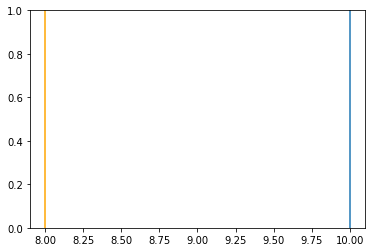

In [199]:
import matplotlib.pyplot as plt
vA = 10
vB = 8


plt.axvline(vA)
plt.axvline(vB, c='orange')

We will simulate 1000 consumers choosing between the two alternatives according to the random utility model. This means that there is a random component that is added to the observed utility to each of the alternatives
## 1.2) Add 1000 random values taken from a uniform distribution (-2, 2) to each of the two alternatives and plot the density functions around each alternative.
*This step will simulate the utility that a 1000 independent consumers get for each product* 

In [177]:

import numpy as np

num_samples = 1000

np.random.seed(1234)

#we could be using np.random.uniform here instead of np.random.rand and some manual scaling to simulate the uniform
eA = np.random.rand(num_samples)*4 - 2
eB = np.random.rand(num_samples)*4 - 2

uA = vA + eA
uB = vB + eB

We will plot the density function, this time adding the vertical lines that pass through the observed utility part to act as a reference.

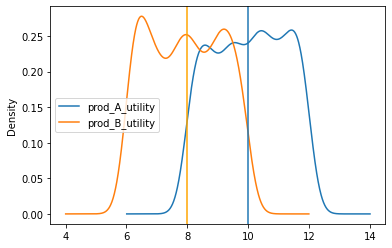

In [200]:
import pandas as pd

pd.DataFrame({'prod_A_utility':uA, 'prod_B_utility':uB}).plot(kind='density')
plt.axvline(vA)
plt.axvline(vB, c='orange')

We see that the probability distributions overlap, which means that there is a chance that the utility of product B is large than the utility of product A, even though the observed part is not.

If there was no random component, a consumer will always choose the option with the larger observed utility. But because of the random component, there is a chance that the product with less observed utility ends up being the one with the larger total utility. This is visualized by the overlapping density function in the plot. Because of randomness, we will need to talk about choice probabilities, it is the best we can do, we cannot perfectly predict the choice.
## 1.3) Calculate the choice probabilities for the first item. (counting how many times its utility is larger than the utility of other item).

In [179]:
np.mean(uA > uB)

0.883

The larger the variance of the random component, the more 'random' the choices are. We can see how this affects the choice probabilities by simulating different scenarios where the only thing that changes is the variance of the random component. In the uniform distribution, we can just play with the range of the distribution, keeping it centered in 0.

## 1.4) Try creating a plot of the choice probability of the first item with respect to the range of the uniform distribution centered in 0 (eg. U(0,0), U(-0.1, 0.1), U(-0.2, 0.2), ... U(-10, 10).

*Simulate serveral scenarios with more and more variance in the random component, the more variance the more the choice probabilities go to 0.5 for each product (even though product A will always have higher chance of being chosen than product B).*

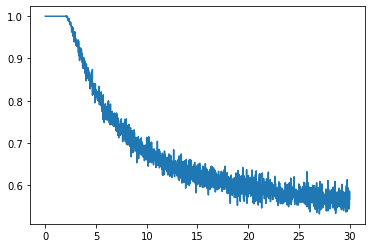

In [180]:

rang = np.linspace(0, 30, num=2000)

def prob_range(range):
 range_uA = vA + np.random.rand(num_samples) * range - range/2
 range_uB = vB + np.random.rand(num_samples) * range - range/2
 return np.mean(range_uA > range_uB)

probs= [prob_range(range) for range in rang]

plt.plot(rang, probs)

We will now see a few limitations of the utility that can be recovered from the data. We will see that the different possible values of utility produce the same choice probabilities. Therefore there are many values for the utility that are consistent with the experimental observations

##1.5) Going back to the first scenario, create a new choice scenario of two alternatives by adding a constant (nonzero please) to the utilities and plot the densities together with the original ones, using different colors and a proper constant so the plot looks nice. Then compute the choice probabilities of the new setting: Do they change w.r.t. the original ones or are the probabilties the same? Do you think that the true utility can be recovered when we only observe the results of the choices?
*Add a constant to the utilities in the experiment to simulate 'another' scenario when the observed components of utility are different from the original, the plot everything together to get a visual understanding on how different the two scenarios are.*


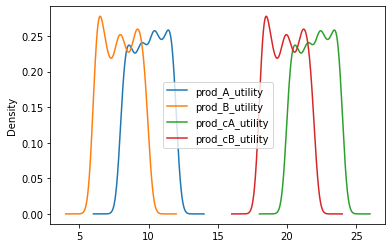

In [181]:
my_add_const = 12
cuA = uA + my_add_const
cuB = uB + my_add_const
pd.DataFrame({'prod_A_utility':uA, 'prod_B_utility':uB,
              'prod_cA_utility': cuA,
              'prod_cB_utility': cuB}).plot(kind='density')


When we add a constant to the observed components, the choice probabilities remain the same. A consequence of that is that when we only observe the choice proabilities, as is the case in experimental data, we can recover many possible values for the observed utility, all consistent with the data. Therefore we do not know which one is the 'true value' for the observed component.

In [182]:
print('Probability of choosing A in the Original utilities scenario:', np.mean(uA > uB))
print('Probability of choosing A in the Additive constant utilities scenario:', np.mean(cuA > cuB))

Probability of choosing A in the Original utilities scenario: 0.883
Probability of choosing A in the Additive constant utilities scenario: 0.883


## 1.6) Repeat 1.5, but instead *adding* a constant to the utilities, *multiply* the utilities by a constant (positive).


Probability of choosing A in the Original utilities scenario: 0.883
Probability of choosing A in the Multiplicative constant utilities scenario: 0.883


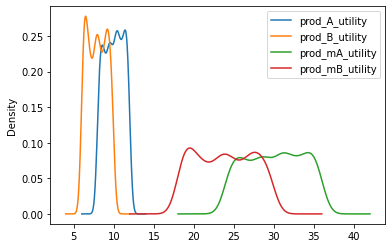

In [183]:
my_multi_const = 3
muA = uA * my_multi_const
muB = uB * my_multi_const
pd.DataFrame({'prod_A_utility':uA, 'prod_B_utility':uB,
              'prod_mA_utility': muA,
              'prod_mB_utility': muB}).plot(kind='density')

print('Probability of choosing A in the Original utilities scenario:', np.mean(uA > uB))
print('Probability of choosing A in the Multiplicative constant utilities scenario:', np.mean(muA > muB))

Consider that the choice probabilties do not change when adding a constant or when multiplying by a constant:
Do you think that values of the utility can be recovered, or only the relative order of the preferences?
This is what is called Cardinal utility vs Ordinal utility.

In cardinal utility, the values of the utility are meaningful, in ordinal utility, they can only represent the relative order between a set of alternatives.

As a consequence, do you think that two set of utilities that have been estimated separately can be compared? For example, on one hand we have a dataset about coffee preferences from which we recover the utilies for the alternatives latte, espresso, long black. On the other hand we have a dataset about car preference, we recover the preferences for van, sedan, and sports car.
Will be able to compare utilities from the coffee dataset to utilities from the car dataset in a meaningful way? Will we be able to know what alternatives produce the most utility across datasets, for example a latte vs a sports car?

We will now see that the type of probability distribution of the noise does not affect the choice probabilities, therefore this is another piece of the RUM that cannot be truly recovered from the experimental data.

## 1.7) Change the distribution of the random component in the original experiment form a U(-2,2) to a Gaussian with mean 0 and variance $\frac{16}{12}$. Do the choice probabilities change (much)?
*It is unlikely that we will get exactly the same choice probabilities, but it will be clear that we could make then arbitrarily close if we tune the variance of the gaussian.*


In [184]:
#we scale them down a bit, see that the choice probabilities are very similar to the noise
gauss_eA = np.random.normal(0, 14.5/12, num_samples)
gauss_eB = np.random.normal(0, 14.5/12, num_samples)

gauss_uA = vA + gauss_eA
gauss_uB = vB + gauss_eB

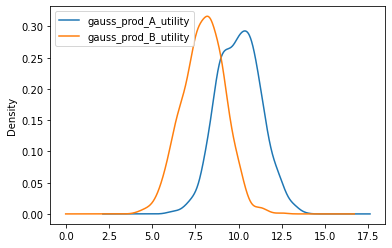

In [185]:
pd.DataFrame({'gauss_prod_A_utility':gauss_uA, 'gauss_prod_B_utility':gauss_uB}).plot(kind='density')

In [186]:
np.mean(gauss_uA > gauss_uB)

0.885

The consequence is that the distribution of the random component cannot be recovered, since there are many distribution that will lead to the same choice probabilities. In practice, it will depend on the model that we the analysts assume for the observed component.

# 1.8) Finally, try a different distribution for each of the alternatives, e.g. Uniorm for the first item, Gaussian for the second, see if you can reach the same choice probabilities
*This part is for extra clarification*


The choice probabilities are similar enough, though we coul fine tune it to make it better.

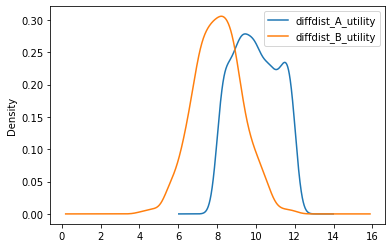

In [187]:
uniform_eA = np.random.uniform(-2, 2, num_samples)
gauss_2_eB = np.random.normal(0, 14.5/12, num_samples)

diffdist_uA = vA + uniform_eA
diffdist_uB = vB + gauss_2_eB

pd.DataFrame({'diffdist_A_utility':diffdist_uA, 'diffdist_B_utility':diffdist_uB}).plot(kind='density')

In [188]:
np.mean(diffdist_uA > diffdist_uB)

0.869

---
---

# 2) Intuition on likelihood


Let's consider the following scenario: We are responsible for the sales of umbrellas in a large department store, we would like to understand a bit more about the process.
We have a sample of the clients that come into the store, knowing whether they bought an umbrella or not, a simple binary choice.

Our first approximation consists of assuming that all clients are equivalent, so every time a client enters our store, they choose whether to buy an umbrella or not following some probability (but the probability is the same for all clients).

## 2.1) What do you think is the probability distribution that governs the decision-making process under our initial assumptions?
 A random choice between two alternatives, there is a 'famous' probability distribution that is used to model experiments with 2 possible outcomes... *You can write the answer here, if you want.*

---

This unique probability, lets call it $p_{\Omega}$ is the parameter in our simple model.

Our data for the clients coming to our store is [in this file](https://raw.githubusercontent.com/pmontman/pub-choicemodels/main/data/umbrella_month.csv), lets take a look at it.


In [189]:
import pandas as pd
umbrella_df = pd.read_csv("https://raw.githubusercontent.com/pmontman/pub-choicemodels/main/data/umbrella_month.csv")

umbrella_df.head(5)

,buy_umbr,month,client_id
0,True,12,1
1,False,10,2
2,False,6,3
3,True,5,4
4,True,12,5


the variable **buy_umbr** indicates whether the client bought the umbrella, **month** is the month when the client visited the store (it is some 'side information' that we will use later to come up with a better model).



## 2.2) Compute the likehood function for a range of values of $p_{\Omega}$ and plot them.
*For each value of $p_{\Omega}$ compute the likelihood function: the probability of having ovserved the data if $p_{\Omega}$ was the value of the Bernouilli that generates the experimental data.*
*Because there are many repetitions of the experiment, the likelihood for all is the joint probability. We can assume that the observations are independent therefore the joint probability is calculated by the product of all individual ones.* *The product of many small number will produced 'numerical problems' in the computations, rounding errors because of the limitations. A way to mitigate the issue is to transform the product into a sum of larger numbers by taking the logarithm. We can use the logarithm to do maximum likelihood because the logarithm does not change which input value produces the maximum.*

HINT: You can transform the product in the likelhood function to a sum by taking the logarithm. $\log(a\times b \times c) = log(a) + log(b) + log(c)$. This is commonly done when calculating likelihoods, because computing many products of small numbers produces numerical problems (very small numbers are difficult to handle by computers). This technique is so commo that we often tlak about log likelihoods.

The best value for p_omega according to likelihood is: 0.5445454545454546


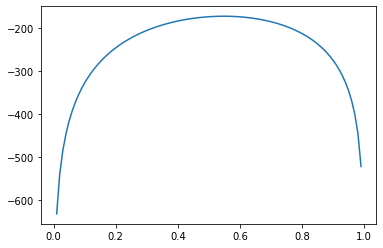

In [191]:
def likeli_uniprob(p_omega):
  return np.sum(np.log( (p_omega**umbrella_df['buy_umbr']) * 
                ( (1- p_omega)**(1-umbrella_df['buy_umbr'])) ) )

p_omega_range = np.linspace(0.01, 0.99, 100)
likelihoods_for_p_omega = [likeli_uniprob(po) for po in p_omega_range]

plt.plot(p_omega_range, likelihoods_for_p_omega)
print('The best value for p_omega according to likelihood is:', p_omega_range[np.argmax(likelihoods_for_p_omega)])

We now go for a more advanced model. We have data about the month that the clients visit our store, and we think with that the probability of buying an umbrella can be approximated more accurately if we consider the month in our model. The probability therefore is not unique, it varies from month to month.

#2.3) Can you think of a function that could express the relationship between month and the probability of buying an umbrella?
HINT: You can plot the data, and think of functions that create cyclical patterns. The answer does not have to be perfect! There are many different possibilities, the main point is using the information about the month to now produce a probability of buying an umbrella for each client, instead of the same for all clients.

*Please write some answer here*


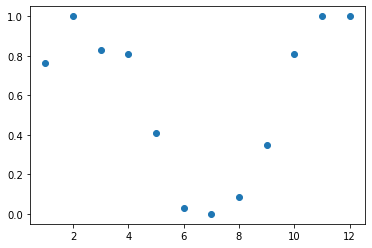

In [192]:
#lets plot the estimation of probabilities per month
bymonth = umbrella_df.groupby('month').mean()
plt.scatter(bymonth.index, bymonth['buy_umbr'])


**Looks like a sinusoidal, $sin(x)$, representing yearly cycles, but we have to transform it into probabilities 0-1. $\frac{sin(x) +1}{2}$ keeps the output between 0 and 1, but remember that there are many possibilities that you can think of!**

To better tune the solution, we introduce a parameter in our model, we will first multiply the number of the month by this parameter and then transform this through the function that creates cycles.

##2.4) Plot the likelihood function of that parameter for a range of values. What are some good values for that parameter? Compare the likelihoods of this model with the initial one, which model do you think  is better?

The max likelihood for the unique prob model is: -172.13903633220917 
 The max likelihood for the sinusoidal model is: -88.53160212617345


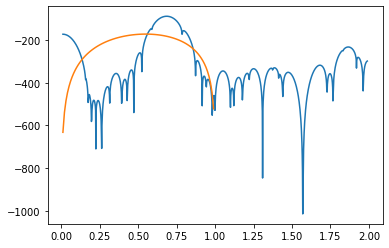

In [193]:
def cycle_transform(param):
  return (np.sin(umbrella_df['month']*param) + 1)/2

def likeli_sinusoid(param):
  p_sin = cycle_transform(param)
  return np.sum(np.log( (p_sin**umbrella_df['buy_umbr']) * 
                ( (1- p_sin)**(1-umbrella_df['buy_umbr'])) ) )


cycle_transform(0.5)
param_range = np.linspace(0.01, 1.99, 1100)
likelihoods_sinusoid = [likeli_sinusoid(param) for param in param_range]

plt.plot(param_range, likelihoods_sinusoid)
plt.plot(p_omega_range, likelihoods_for_p_omega)
print('The max likelihood for the unique prob model is:',
      np.max(likelihoods_for_p_omega), '\n',
      'The max likelihood for the sinusoidal model is:', np.max(likelihoods_sinusoid))

#print('The best value for p_omega according to likelihood is:', p_omega_range[np.argmax(likelihoods_for_p_omega)])

In the following plot we will see: In blue, the true probabilities, in orange, the best approximation with the cycycal pattern, in red, the best approximation with a unique probability.

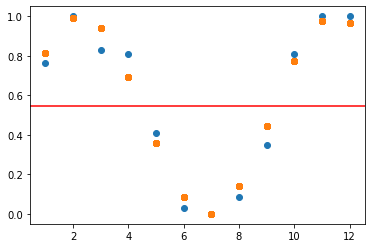

In [194]:
#@title Plot of the probabilities of buying umbrella produced by the models
best_param = param_range[np.argmax(likelihoods_sinusoid)]




plt.scatter(bymonth.index, bymonth['buy_umbr'])
plt.scatter(umbrella_df['month'], cycle_transform(best_param))
plt.axhline(y=p_omega_range[np.argmax(likelihoods_for_p_omega)], color='r', linestyle='-')